In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, minimize, report_fit

import scqubits as scq

In [3]:
def fmon(x, eigen, a, b, c):
    """Fluxonium lineshape."""
    fluxonium = scq.Fluxonium(EJ = a,
                            EC = b,
                            EL = c,
                            flux = 0.33,
                            cutoff = 110)
    specdata = fluxonium.get_spectrum_vs_paramvals('flux',
                                                  x,
                                                  evals_count = 3,
                                                  subtract_ground = True)
    model = specdata.energy_table[:,eigen]
    return model


def fmon_dataset(params, i, x):
    """Calculate Fluxonium lineshape from parameters for data set."""
    a = params['EJ_%i' % (i+1)]
    b = params['EC_%i' % (i+1)]
    c = params['EL_%i' % (i+1)]
    return fmon(x, i, a, b, c)


def objective(params, x, data):
    """Calculate total residual for fits of Fluxoniums to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - fmon_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

In [4]:
x = np.linspace(0, 1, 50)
data = []
for _ in np.arange(3):
    params = Parameters()
    a, b, c = 8.9, 2.5, 0.5
    dat = fmon(x, _, a, b, c) + np.random.normal(size=x.size, scale=0.25)
    data.append(dat)
data = np.array(data)

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

[[Variables]]
    EJ_1:  5.00000000 (init = 5)
    EC_1:  5.00000000 (init = 5)
    EL_1:  0.50000000 (init = 0.5)
    EJ_2:  9.99999784 (init = 5)
    EC_2:  2.78002993 (init = 5)
    EL_2:  0.50038432 (init = 0.5)
    EJ_3:  8.22852016 (init = 5)
    EC_3:  2.98217342 (init = 5)
    EL_3:  0.51056505 (init = 0.5)


Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

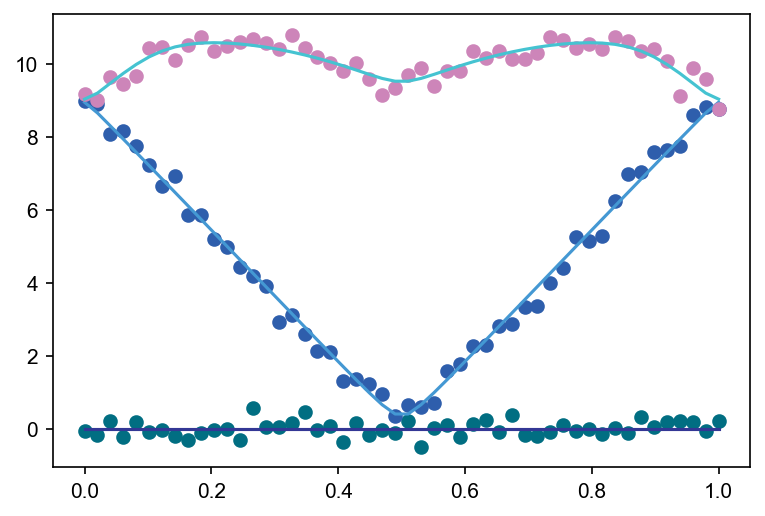

In [5]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('EJ_%i' % (iy+1), value=5, min=0.0, max=10.0)
    fit_params.add('EC_%i' % (iy+1), value=5, min=0.0, max=10.0)
    fit_params.add('EL_%i' % (iy+1), value=0.5, min=0.0, max=1.0)
    
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

plt.figure()
for i in range(3):
    y_fit = fmon_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()